- **순환 신경망**(recurrent neural network)과 **1D 컨브넷**(1D convnet) : 시퀀스 데이터를 처리하는 딥러닝 모델
    - 문서 분류, 시계열 분류
        - 글의 주제, 책의 저자 식별 등
    - 시계열 비교
        - 두 문서나 두 주식 가격이 얼마나 밀접하게 관련이 있는지 등
    - 시퀀스-투-시퀀스 학습
        - 영어 문장을 프랑스어로 변환하기 등
    - 감성 분석
        - 트윗이나 영화 리뷰가 긍정적인지 부정적인지 분류하기
    - 시게열 예측
        - 어떤 지역의 최근 날씨 데이터가 주어졌을 때 향후 날씨 예측하기

# 6.1 텍스트 데이터 다루기
- 시퀀스 처리용 딥러닝 모델 : 문서 분류, 감성 분석, 저자 식별, (제한된 범위의) 질문 응답(Question Answering) 등에 적합
- 문자 언어(written language)에 대한 통계적 구조를 만듦
- 자연어 처리(natural language processing) 딥러닝 모델 : 단어, 문장, 문단에 적용한 패턴 인식
- 텍스트 원본을 입력으로 사용하지 못함
- **텍스트 벡터화**(vectorizing text) : 텍스트를 수치형 데이터로 변환
    - 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환
    - 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환
    - 텍스트에서 단어나 문자의 **n-그램**(n-gram)을 추출하여 각 n-그램을 하나의 벡터로 변환
- **토큰**(token) : 텍스트를 나누는 단어, 문자, n-그램 등의 단위
- **토큰화**(tokenization) : 텍스트를 토큰으로 나누는 작업
- 토큰과 벡터를 연결하는 방법 : **원-핫 인코딩**(one-hot encoding), **토큰 임베딩**(token embedding; **단어 임베딩**)

### n-그램과 BOW
- 단어 n-그램 : 문장에서 추출한 N개의 연속된 단어 그룹
- **BoW**(Bag-of-Words) : 문장을 n-그램으로 나누는 토큰화 방법
    - 순서가 없는 토큰화 방법(시퀀스가 아닌 집합으로 간주)이기 때문에 딥러닝보다 머신러닝 모델에 주로 사용됨

## 6.1.1 단어와 문자의 원-핫 인코딩
- 모든 단어에 고유한 정수 인덱스를 부여하고 이 정수 인덱스 i를 크기가 N인 이진 벡터로 변환

### 단어 수준의 원-핫 인코딩하기

In [1]:
import numpy as np

# 초기 데이터 샘플 (문장 또는 문서 전체)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스 구축
token_index = {}
for sample in samples:
    # 샘플을 토큰화 (구두점과 특수 문자도 사용할 수 있음)
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스 할당 (0은 사용하지 않음 - 시퀀스 패딩에 사용)
            token_index[word] = len(token_index) + 1

# 샘플을 벡터로 변환할 때 단어 최대 개수
max_length = 10

# 결과 저장 배열
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [2]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

### 문자 수준 원-핫 인코딩하기

In [3]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 출력 가능한 모든 아스키(ASCII) 문자
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [4]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 케라스를 사용한 단어 수준의 원-핫 인코딩하기
- 특수 문자 제거, 빈도가 높은 N개의 단어만 선택(입력 벡터 공간이 너무 커지지 않도록 제한)
- 위 방법은 `(samples, max_length, token_length + 1)`의 크기이며 케라스 방식은 `(samples, max_length)`의 크기
- `texts_to_matrix()` 메서드 : 텍스트를 시퀀스로 바꿔주는 `texts_to_sequences()` 메서드와 시퀀스 리스트를 넘파이 배열로 바꿔주는 `sequences_to_matrix()` 메서드를 차례대로 호출한 것
    - `binary` : 이진 벡터 표현 (출현하면 1, 아니면 0)
    - `count` : 단어 출현 횟수
    - `freq` : 출현 횟수를 전체 시퀀스의 길이로 나누어 정규화
    - `tfidf` : TF-IDF 방식

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1000개의 단어만 선택
tokenizer = Tokenizer(num_words=1000)

# 단어 인덱스 구축
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스 리스트로 변환
seqences = tokenizer.texts_to_sequences(samples)

# 원-핫 이진 벡터
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스
word_index = tokenizer.word_index

print(f'{len(word_index)}개의 고유한 토큰을 찾았습니다.')

9개의 고유한 토큰을 찾았습니다.


In [6]:
seqences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [7]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### 해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기
- **원-핫 해싱**(one-hot hashing) : 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 다루기 어려울 때 사용
    - 단어를 해싱하여 고정된 크기의 벡터로 변환
    - 단어 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있음
    - 단점 : **해시 충돌**(hash collision)으로 2개의 단어가 같은 해시를 만들면 단어 사이의 차이를 인식하지 못하는 것
- 해싱 공간 차원이 해싱될 토큰의 전체 개수보다 훨씬 크면 충돌 가능성이 낮아짐

In [8]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1000인 벡터로 저장 (그 이상의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것)
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1000 사이의 랜덤한 정수 인덱스로 변환
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [9]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [10]:
hash('The')

372512797285208076

In [11]:
hash('cat')

473603808622937080

## 6.1.2 단어 임베딩 사용하기
- **단어 임베딩** : 밀집 **단어 벡터**(word vector)
- 원-핫 인코딩으로 만든 벡터는 희소(sparse)하고 고차원인 반면 단어 임베딩은 저차원의 실수형 벡터
- 보통 256, 512 또는 1024차원 단어 임베딩을 사용(원-핫 인코딩은 그보다 훨씬 큼)
- 단어 임베딩 만드는 방법
    - 관심 대상인 문제와 함께 단어 임베딩을 학습 : 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습
    - **사전 훈련된 단어 임베딩**(pretrained word embedding) 사용

### Embedding 층을 사용하여 단어 임베딩 학습하기
- 문제점 : 임베딩 공간이 구조적이지 않다는 것
    - exact와 accurate 등은 비슷한 의미로 사용되지만 완전히 다른 임베딩을 가짐
- 단어 임베딩 : 언어를 기하학적 공간에 매핑하는 것
- 'king' 벡터 + 'female' 벡터 = 'queen' 벡터 등
- 특정 의미 관계의 중요성이 작업에 따라 다르기 때문에 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당함

### Embedding 층의 객체 생성하기
- 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해
- 단어 인덱스 → Embedding 층 → 연관된 단어 벡터
- `Embedding` 층은 크기가 `(samples, sequence_length)`인 2D 정수 텐서를 입력으로 받음
    - 배치에 있는 모든 시퀀스는 길이가 같아야 하므로 작은 길이의 시퀀스는 0으로 패딩되고 길이가 더 긴 시퀀스는 잘림
- `(samples, sequence_length, embedding_dimensionality)`인 3D 실수형 텐서를 반환

In [12]:
from tensorflow.keras.layers import Embedding

# 적어도 2개의 매개변수를 받음 - 가능한 토큰의 개수(1000개(단어 인덱스 최댓값 + 1))와 임베딩 차원(64)
embedding_layer = Embedding(1000, 64)

### Embedding 층에 사용할 IMDB 데이터 로드하기
- `maxlen` : 뒤의 maxlen개의 단어만 남김
    - `truncating='post'`로 앞의 maxlen개의 단어만 남길 수도 있음

In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000

# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train[0])

# 리스트를 2D 정수 텐서로 변환
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[  65   16   38 1334   88   12   16  283    5   16 4472  113

### IMDB 데이터에 Embedding 층과 분류기 사용하기
- 역전파 수행 시 가중치 업데이트와 함께 학습됨

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # Flatten을 하기 위하여 input_length 지정 - 첫 번째 배치 차원을 제외한 나머지 차원이 결정되어야 Flatten 가능

model.add(Flatten()) # 3D 임베딩 텐서를 (samples, maxlen*8) 크기의 2D 텐서로 변환

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 0.6689 - acc: 0.6305 - val_loss: 0.6207 - val_acc: 0.6948
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5432 - acc: 0.7532 - val_loss: 0.5281 - val_acc: 0.7286
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4604 - acc: 0.7894 - val_loss: 0.5002 - val_acc: 0.7412
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4187 - acc: 0.8110 - val_loss: 0.4942 - val_acc: 0.7522
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3909 - acc: 0.8278 - val_loss: 0.4935 - val_acc: 0.7550
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3679 - acc: 0.8400 - val_loss: 0.4992 - val_acc: 0.7564
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3478 - acc: 0.8518 - val_loss: 0.5022 - val_acc: 0.7562
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

- 단어 사이의 관계나 문장 구조를 고려하지 않음

### 사전 훈련된 단어 임베딩 사용하기
- 훈련 데이터가 부족할 때
- 사전 훈련된 컨브넷을 사용하는 것과 비슷한 이유
- **Word2vec** 알고리즘 : 2013년 구글의 토마스 미코로브(Tomas Mikolov)가 개발, 성별처럼 구체적인 의미가 있는 속성을 잡아냄
- **GloVe** 알고리즘 : 단어의 동시 출현(co-occurrence) 통계를 기록한 행렬을 분해하는 기법

## 6.1.3 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지
- 문장들을 벡터의 시퀀스로 임베딩

### 원본 IMDB 텍스트 내려받기
- [IMDB 원본 데이터셋](http://mng.bz/0tIo)

### IMDB 원본 데이터 전처리하기

In [16]:
import os

imdb_dir = '../datasets/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
            print(f'{fname} complete.', end='\r')
print('IMDB datasets load complete')

10622_3.txt complete.

IMDB datasets load complete


In [17]:
texts[0], labels[0]

("Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 0)

### 데이터 토큰화
- 사전 훈련된 단어 임베딩은 훈련 데이터가 부족할 때 유용(그렇지 않으면 문제에 특화된 임베딩이 훨씬 성능이 좋음)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버림
training_samples = 200 # 훈련 샘플 200개
validation_samples = 10000 # 검증 샘플 10000개
max_words = 10000 # 가장 빈도가 높은 1만개의 단어만 사용

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
seqences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'{len(word_index)}개의 고유한 토큰을 찾았습니다.')

88582개의 고유한 토큰을 찾았습니다.


In [25]:
data = pad_sequences(seqences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기 :', data.shape)
print('레이블 텐서의 크기 :', labels.shape)

데이터 텐서의 크기 : (25000, 100)
레이블 텐서의 크기 : (25000,)


In [26]:
data[0]

array([  34,   44, 7576, 1414,   15,    3, 4252,  514,   43,   16,    3,
        633,  133,   12,    6,    3, 1301,  459,    4, 1751,  209,    3,
       7693,  308,    6,  676,   80,   32, 2137, 1110, 3008,   31,    1,
        929,    4,   42, 5120,  469,    9, 2665, 1751,    1,  223,   55,
         16,   54,  828, 1318,  847,  228,    9,   40,   96,  122, 1484,
         57,  145,   36,    1,  996,  141,   27,  676,  122,    1,  411,
         59,   94, 2278,  303,  772,    5,    3,  837,   20,    3, 1755,
        646,   42,  125,   71,   22,  235,  101,   16,   46,   49,  624,
         31,  702,   84,  702,  378, 3493,    2, 8422,   67,   27,  107,
       3348])

In [27]:
# 데이터를 훈련 세트와 검증 세트로 분할
# 샘플이 순서대로 있기 때문에 shuffle
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

### GloVe 단어 임베딩 내려받기
- 2014년 영문 위키피디아를 사용하여 사전에 계산된 [임베딩 파일](https://nlp.stanford.edu/projects/glove/) - [glove.6B.zip](https://nlp.stanford.edu/data/glove.6B.zip)
- 40만 개의 단어에 대한 100차원의 임베딩 벡터

### 임베딩 전처리
- txt 파일을 파싱하여 단어(문자열)와 이에 상응하는 벡터 표현을 매핑하는 인덱스 만들기

### GloVe 단어 임베딩 파일 파싱하기

In [28]:
glove_dir = '../datasets/glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(f'{len(embeddings_index)}개의 단어 벡터를 찾았습니다.')

400000개의 단어 벡터를 찾았습니다.


### GloVe 단어 임베딩 행렬 준비하기
- 행렬의 크기 : `(max_words, embedding_dim)`

In [29]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0

### 모델 정의하기

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### 모델에 GloVe 임베딩 로드하기
- `Embedding` 층을 동결

In [31]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### 모델 훈련과 평가

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('../models/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 84ms/step - loss: 1.0437 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.4966
Epoch 2/10
7/7 [==============================] - 0s 70ms/step - loss: 0.6877 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 3/10
7/7 [==============================] - 0s 71ms/step - loss: 0.6853 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 4/10
7/7 [==============================] - 0s 67ms/step - loss: 0.6836 - accuracy: 0.5550 - val_loss: 0.6929 - val_accuracy: 0.5106
Epoch 5/10
7/7 [==============================] - 0s 67ms/step - loss: 0.6770 - accuracy: 0.5950 - val_loss: 0.6956 - val_accuracy: 0.5063
Epoch 6/10
7/7 [==============================] - 0s 77ms/step - loss: 0.6608 - accuracy: 0.5300 - val_loss: 0.6897 - val_accuracy: 0.5580
Epoch 7/10
7/7 [==============================] - 0s 68ms/step - loss: 0.6308 - accuracy: 0.7950 - val_loss: 0.7595 - val_accuracy: 0.4965
Epoch 8/10
7/7 [===========

### 결과 그래프 그리기

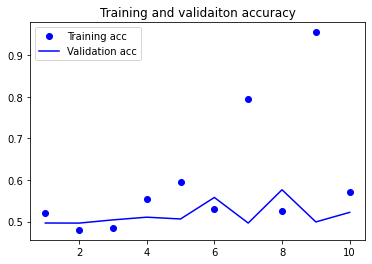

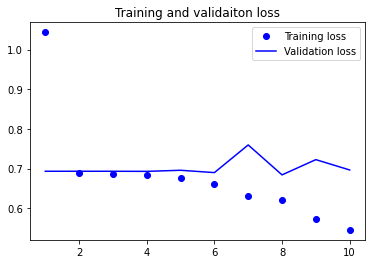

In [34]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaiton accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaiton loss')
plt.legend()

plt.show()

### 사전 훈련된 임베딩을 사용하지 않고 같은 모델 훈련하기
- 사전 훈련된 단어 임베딩을 사용하는 것보다 정확도가 낮음
- 샘플 데이터 수를 늘리면 단어 임베딩을 사용하는 것보다 정확도가 높음

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 86ms/step - loss: 0.6938 - accuracy: 0.5300 - val_loss: 0.6921 - val_accuracy: 0.5226
Epoch 2/10
7/7 [==============================] - 0s 80ms/step - loss: 0.5580 - accuracy: 0.9800 - val_

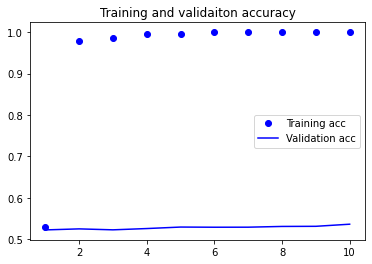

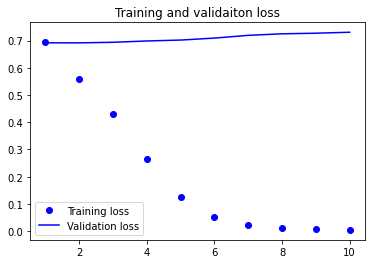

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaiton accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaiton loss')
plt.legend()

plt.show()

### 테스트 데이터 토큰화

In [37]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
            print(f'{fname} complete.', end='\r')
print('IMDB datasets load complete')

IMDB datasets load complete


In [38]:
seqences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(seqences, maxlen=maxlen)
y_test = np.asarray(labels)

### 테스트 세트에서 모델 평가하기

In [39]:
model.load_weights('../models/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.5174


[0.6986676454544067, 0.5174400210380554]